<a href="https://colab.research.google.com/github/aunz/Insight-Data-Science-Challenge/blob/master/Hapy_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!curl -o data.zip https://raw.githubusercontent.com/aunz/Insight-Data-Science-Challenge/master/happy_hotel.zip
!unzip -qq data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.3M  100 11.3M    0     0  12.1M      0 --:--:-- --:--:-- --:--:-- 12.1M


In [0]:
df1 = pd.read_csv('hotel_happy_reviews.csv')
df2 = pd.read_csv('hotel_not_happy_reviews.csv')

In [0]:
print(df1.info())
df1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26521 entries, 0 to 26520
Data columns (total 4 columns):
User_ID        26521 non-null object
Description    26521 non-null object
Is_Response    26521 non-null object
hotel_ID       26521 non-null int64
dtypes: int64(1), object(3)
memory usage: 828.9+ KB
None


,User_ID,Description,Is_Response,hotel_ID
13684,id30407,"Beautiful hotel, and the staff provides incred...",happy,8
15860,id33573,The hotel is very conveniently located next to...,happy,6
1470,id12514,Just stayed - nights at this hotel. We did not...,happy,8
23910,id45431,The InterContinental Boston is a beautiful new...,happy,2
20282,id40053,"Wow, I've been going to Seahawks and Mariners ...",happy,7


In [0]:
print(df2.info())
df2.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 4 columns):
User_ID        12411 non-null object
Description    12411 non-null object
Is_Response    12411 non-null object
hotel_ID       12411 non-null int64
dtypes: int64(1), object(3)
memory usage: 387.9+ KB
None


,User_ID,Description,Is_Response,hotel_ID
9084,id39001,We booked this hotel for my birthday weekend b...,not happy,7
5211,id26474,"What a dump. For $---night, you get smelly roa...",not happy,7
9153,id39187,Stayed there one night for a convention. It is...,not happy,4
7261,id33150,"This hotel bills itself as a - star property, ...",not happy,10
4325,id23751,I stayed in this hotel for one night and I was...,not happy,2


In [0]:
# number of unique user
len(set(df1.User_ID.unique().tolist() + df2.User_ID.unique().tolist()))

38932

In [0]:
# change the Is_response to 1: happy, 0: unhappy
df1.Is_Response = 1
df2.Is_Response = 0

# drop user_id as it's not important
df1 = df1.drop('User_ID', 1)
df2 = df2.drop('User_ID', 1)

In [0]:
# strip white space
df1.Description = df1.Description.str.strip().str.lower()
df2.Description = df2.Description.str.strip().str.lower()

In [0]:
# number of words
tmp = df1.Description.str.split().apply(len)
print(tmp.describe())


tmp = df2.Description.str.split().apply(len)
print(tmp.describe())

tmp = df1.Description.str.len()
print(tmp.describe())

tmp = df2.Description.str.len()
print(tmp.describe())

count    26521.000000
mean       142.015912
std        117.225847
min          4.000000
25%         66.000000
50%        111.000000
75%        180.000000
max       1780.000000
Name: Description, dtype: float64
count    12411.000000
mean       190.109661
std        151.458119
min          5.000000
25%         92.000000
50%        151.000000
75%        239.500000
max       2289.000000
Name: Description, dtype: float64
count    26521.000000
mean       786.122997
std        645.734294
min         20.000000
25%        368.000000
50%        616.000000
75%        991.000000
max      10482.000000
Name: Description, dtype: float64
count    12411.000000
mean      1042.553864
std        833.261081
min         30.000000
25%        507.000000
50%        827.000000
75%       1308.000000
max      14340.000000
Name: Description, dtype: float64


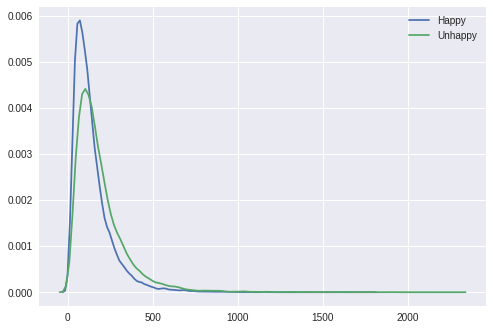

In [0]:
ax = sns.kdeplot(df1.Description.str.split().apply(len), label='Happy')
sns.kdeplot(df2.Description.str.split().apply(len), label='Unhappy');

,Happy,Unhappy,Happy %,Unhappy %
1,2179,1750,0.554594,0.445406
2,1046,1012,0.508260,0.491740
3,3470,1612,0.682802,0.317198
4,4651,2196,0.679276,0.320724
5,5540,1142,0.829093,0.170907
6,823,334,0.711322,0.288678
7,3019,2298,0.567801,0.432199
8,4503,850,0.841211,0.158789
9,513,483,0.515060,0.484940
10,777,734,0.514229,0.485771


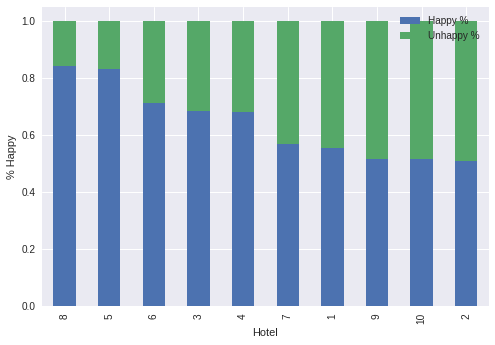

In [0]:
tmp = pd.concat([df1.hotel_ID.value_counts(), df2.hotel_ID.value_counts()], 1, keys=['Happy', 'Unhappy'])
tmp['Happy %'] = tmp['Happy'] / (tmp['Happy'] + tmp['Unhappy'])
tmp['Unhappy %'] = tmp['Unhappy'] / (tmp['Happy'] + tmp['Unhappy'])

tmp[['Happy %', 'Unhappy %']].sort_values('Unhappy %').plot(kind='bar', stacked=True)
plt.xlabel('Hotel')
plt.ylabel('% Happy')

tmp

In [0]:
import nltk
from nltk.corpus import stopwords

!pip install pyLDAvis

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

    100% |████████████████████████████████| 1.6MB 12.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
# not run as this takes tooooooo long

# tmp = ' '.join(df1.Description.str.lower())
# tmp = nltk.word_tokenize(tmp)
# tmp = list(filter(lambda x: x not in stopwords.words('english'), tmp))

# tmp = nltk.FreqDist(tmp)

# tmp.plot(20, cumulative = False)

4547441

In [0]:
df = pd.concat([df1, df2])

data = df.Description.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# remove non english
data = [re.sub('[^a-zA-Z ]', '', sent) for sent in data]

data = [re.sub('hotel|nyc|western|property|room|location', '', sent) for sent in data]

data

<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: Dep

['stayed here with husband and sons on the way to an alaska cruise we all loved the great experience ask for a  on the north tower facing north west for the best views we had a high floor with a stunning view of the needle the city and even the cruise ships we ordered  service for dinner so we could enjoy the perfect views  service dinners were delicious too you are in a perfect spot to walk everywhere so enjoy the city almost forgot heavenly beds were heavenly too',
 'we had  s one was very nice and clearly had been updated more recently than the other the other was clean and the bed was comfy but it needed some updating carpet was old and wrinkled for example great  for visiting inner harbor getting to fells point orioles games etc supershuttle from bwi worked great both ways tv remotes in both s were terrible but we didnt watch much tv so not a big deal wireless was sketchy on th and th floors but again didnt need it much  we were on vacation so it didnt really matter breakfast was 

In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['stayed', 'here', 'with', 'husband', 'and', 'sons', 'on', 'the', 'way', 'to', 'an', 'alaska', 'cruise', 'we', 'all', 'loved', 'the', 'great', 'experience', 'ask', 'for', 'on', 'the', 'north', 'tower', 'facing', 'north', 'west', 'for', 'the', 'best', 'views', 'we', 'had', 'high', 'floor', 'with', 'stunning', 'view', 'of', 'the', 'needle', 'the', 'city', 'and', 'even', 'the', 'cruise', 'ships', 'we', 'ordered', 'service', 'for', 'dinner', 'so', 'we', 'could', 'enjoy', 'the', 'perfect', 'views', 'service', 'dinners', 'were', 'delicious', 'too', 'you', 'are', 'in', 'perfect', 'spot', 'to', 'walk', 'everywhere', 'so', 'enjoy', 'the', 'city', 'almost', 'forgot', 'heavenly', 'beds', 'were', 'heavenly', 'too']]


In [0]:
%%time
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent)) 
        texts_out.append(' '.join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['stay here husband son way alaska cruise love great experience ask north tower face north west good view have high floor stunning view needle city even cruise ship order service dinner could enjoy perfect view service dinner be delicious too be perfect spot walk everywhere so enjoy city almost forget heavenly bed be heavenly too', 'have be very nice clearly have be update more recently other other be clean bed be comfy need updating carpet be old wrinkle example great visit inner harbor get fell point oriole game supershuttle bwi work great way tv remote be terrible do not watch much tv so not big deal wireless be sketchy floor again do not need much be vacation do not really matter breakfast be good morning would stay again town']
CPU times: user 10min 57s, sys: 4min 4s, total: 15min 2s
Wall time: 7min 33s


In [0]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

CPU times: user 2.72 s, sys: 43.4 ms, total: 2.76 s
Wall time: 2.77 s


In [0]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.6335380113917634 %


In [0]:
%%time

lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributesv

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
CPU times: user 38.6 s, sys: 8.35 s, total: 46.9 s
Wall time: 3min 45s


In [0]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -16308530.191625837
Perplexity:  1296.6860061759476
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [0]:
# see topics

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0,0.34,0,0.04,0,0,0.6,9
Doc1,0,0.71,0.05,0,0.22,0,0,0,0,0,1
Doc2,0,0.47,0.05,0,0.47,0,0,0,0,0,1
Doc3,0,0,0,0.17,0.33,0.05,0,0,0.28,0.16,4
Doc4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,7
Doc5,0,0,0,0,0.39,0,0,0,0,0.59,9
Doc6,0,0,0.37,0,0.61,0,0,0,0,0,4
Doc7,0.01,0.25,0.48,0.01,0.01,0.15,0.01,0.01,0.09,0.01,2
Doc8,0,0.39,0,0,0.35,0.06,0,0,0,0.18,1
Doc9,0,0,0.07,0.05,0.5,0,0.19,0.09,0,0.1,4


In [0]:
# 15. Review topics distribution across documents

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,4,12233
1,7,8455
2,1,6407
3,8,4746
4,2,3575
5,9,2452
6,5,796
7,6,195
8,3,60
9,0,13


In [0]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
4      18.718156        1       1  101.766327  -90.215332
7      17.534672        1       2 -108.611221   69.060272
1      16.541642        1       3   32.005730   36.221138
8      14.477527        1       4  -38.853176  -57.374737
2      10.790464        1       5 -182.589478  -35.570126
5       7.099803        1       6   21.126064 -189.802475
9       6.700248        1       7  -27.976276  168.651535
6       3.641420        1       8  175.738419   14.419476
3       2.322738        1       9  111.388069  141.075989
0       2.173330        1      10 -118.238617 -162.226532, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
802   Default  14547.000000     breakfast  14547.000000  30.0000  30.0000
6522  Default  48378.000000          stay  48378.000000  29.0000  29.0000
2984  Default  24891.000000         great  24891.000000  28.0000  28.0000
6064  Default  15518.000000       service  15518.000000  27.0000  27.0000
6475  Default  24462.000000         staff  24462.000000  26.0000  26.0000
2734  Default   8710.000000          free   8710.000000  25.0000  25.0000
1271  Default   4940.000000        coffee   4940.000000  24.0000  24.0000
568   Default  11759.000000          bath  11759.000000  23.0000  23.0000
7479  Default  13109.000000          walk  13109.000000  22.0000  22.0000
6834  Default   6202.000000          tell   6202.000000  21.0000  21.0000
5901  Default   3700.000000           san   3700.000000  20.0000  20.0000
4549  Default  18758.000000          nice  18758.000000  19.0000  19.0000
1112  Default  10145.000000         check  10145.000000  18.0000  18.0000
2925  Default  27996.000000          good  27996.000000  17.0000  17.0000
6955  Default  18186.000000          time  18186.000000  16.0000  16.0000
604   Default  18093.000000           bed  18093.000000  15.0000  15.0000
4089  Default  12170.000000          make  12170.000000  14.0000  14.0000
2056  Default   4300.000000      downtown   4300.000000  13.0000  13.0000
1056  Default   3462.000000        center   3462.000000  12.0000  12.0000
3559  Default   3900.000000      internet   3900.000000  11.0000  11.0000
713   Default   5522.000000         block   5522.000000  10.0000  10.0000
351   Default  11701.000000          area  11701.000000   9.0000   9.0000
6587  Default   7215.000000        street   7215.000000   8.0000   8.0000
3423  Default   3775.000000       include   3775.000000   7.0000   7.0000
4918  Default   7595.000000       parking   7595.000000   6.0000   6.0000
2760  Default  10513.000000      friendly  10513.000000   5.0000   5.0000
3288  Default   3289.000000           hot   3289.000000   4.0000   4.0000
6150  Default   5070.000000        shower   5070.000000   3.0000   3.0000
6463  Default   4602.000000        square   4602.000000   2.0000   2.0000
7660  Default   3666.000000     wonderful   3666.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
838   Topic10    155.617492        broken    156.503857   3.8232  -5.7613
563   Topic10    148.482885         basis    149.369189   3.8230  -5.8083
225   Topic10    137.753761      ambience    138.640066   3.8225  -5.8833
3330  Topic10    135.893796     hurricane    136.780040   3.8224  -5.8968
5588  Topic10    129.762953         regis    130.649192   3.8221  -5.9430
1965  Topic10    129.566407       display    130.452744   3.8221  -5.9445
299   Topic10    124.882642       anytime    125.768992   3.8218  -5.9813
4917  Topic10    131.044328        parker    131.991545   3.8217  -5.9332
6698  Topic10    120.540705       support    121.427005   3.8216  -6.0167
3462  Topic10    118.434523      industry    119.320912   3.8215  -6.0344
950   Topic10    188.697674        camera    203.767652   3.7521  -5.5686
74   

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,aaa,aarp,aback,abandon,ability,abit,able,abound,aboveaverage,abri,...,yuk,yum,yummy,zabar,zaza,zealand,zen,zip,zone,zoo
Topic0,0.100033,13.713597,0.100049,0.100028,0.100034,0.100013,0.100025,0.100019,15.057197,0.100013,...,23.983771,0.100008,0.100029,0.100006,0.100015,0.100076,0.100015,23.460394,5.836276,0.100029
Topic1,0.100030,0.100007,1.096291,0.100035,0.100033,12.651827,42.728154,0.100040,0.100033,0.100011,...,0.100041,0.100007,54.584969,0.100013,0.100031,0.100051,0.100042,0.100068,0.100031,0.100032
Topic2,0.100063,0.100024,0.100022,10.197786,0.100043,0.100026,180.544347,13.945634,0.100056,0.100035,...,0.100023,0.100015,0.169365,0.100006,0.100018,0.100025,0.100008,0.100051,44.525850,0.100026
Topic3,0.100048,0.100021,0.100022,0.100032,0.100025,0.100029,0.270177,0.100023,0.100012,0.100032,...,0.100061,9.328615,46.059583,0.100013,0.100014,0.100015,0.100008,0.100030,0.100033,0.100053
Topic4,0.100048,0.100010,0.100011,0.100019,0.100023,9.814808,888.927432,0.100050,0.100008,0.100024,...,0.100009,0.100007,35.990929,0.100011,0.100009,0.100012,0.100010,3.292634,0.100063,301.187124


In [0]:
# 18. Get the top 15 keywords each topic

# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,westin,club,housekeeping,omni,disappointing,concierge,lack,filthy,exceptional,attitude,avoid,daily,sign,world,offer
Topic 1,bed,bath,stay,nice,shower,look,small,floor,lobby,old,water,place,just,really,good
Topic 2,good,free,nice,breakfast,stay,internet,parking,use,area,pool,price,clean,business,wifi,lobby
Topic 3,breakfast,coffee,fruit,egg,include,fresh,juice,hot,cereal,tea,waffle,bagel,buffet,serve,minor
Topic 4,great,stay,staff,nice,restaurant,good,clean,walk,friendly,helpful,breakfast,comfortable,night,service,area
Topic 5,service,make,guest,want,review,customer,experience,kid,food,say,year,pool,know,offer,star
Topic 6,center,downtown,convention,walk,conference,seattle,area,date,block,stay,street,marriott,hollywood,business,staff
Topic 7,stay,good,time,night,walk,clean,new,small,great,just,square,street,staff,place,bed
Topic 8,check,night,desk,tell,stay,say,day,ask,leave,time,come,arrive,book,door,work
Topic 9,stay,staff,great,san,make,time,service,wonderful,trip,friendly,love,visit,recommend,year,experience


In [0]:
df['dominant_topic'] = df_document_topic['dominant_topic'].tolist()

In [0]:
tmp = df.groupby(['hotel_ID', 'dominant_topic']).mean()
tmp = pd.concat([tmp.loc[[i]].reset_index()['Is_Response'] for i in range(1, 11)], 1, keys=range(1, 11), names='Hotel')
tmp

,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.329759,1.000000,0.250000,1.000000,0.463687,0.000000,1.000000,0.365079,0.377104
1,0.378655,0.472222,0.509524,0.492228,0.673449,0.669725,0.391350,0.727513,0.505263,0.485075
2,0.444162,0.600000,0.621339,0.614767,0.811744,0.800000,0.523901,0.815217,0.788136,0.500000
3,1.000000,0.806452,0.714286,1.000000,0.888889,0.903226,0.750000,0.818182,0.482759,0.809645
4,0.844362,0.444444,0.911455,0.905482,0.954033,0.571429,0.846829,0.961975,0.750000,0.366667
5,0.455556,0.750000,0.542857,0.570248,0.778571,0.888889,0.425000,0.750000,0.520179,0.800000
6,0.650000,0.536797,0.666667,0.903226,0.838710,0.754941,0.689655,1.000000,0.118750,0.556923
7,0.592152,0.120112,0.699065,0.710526,0.857339,0.286885,0.586902,0.833043,0.966667,0.096899
8,0.139116,0.930000,0.217886,0.229240,0.400000,0.962500,0.139814,0.405896,NaN,0.906250
9,0.938389,NaN,0.956790,0.951111,0.976562,NaN,0.908397,0.989717,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


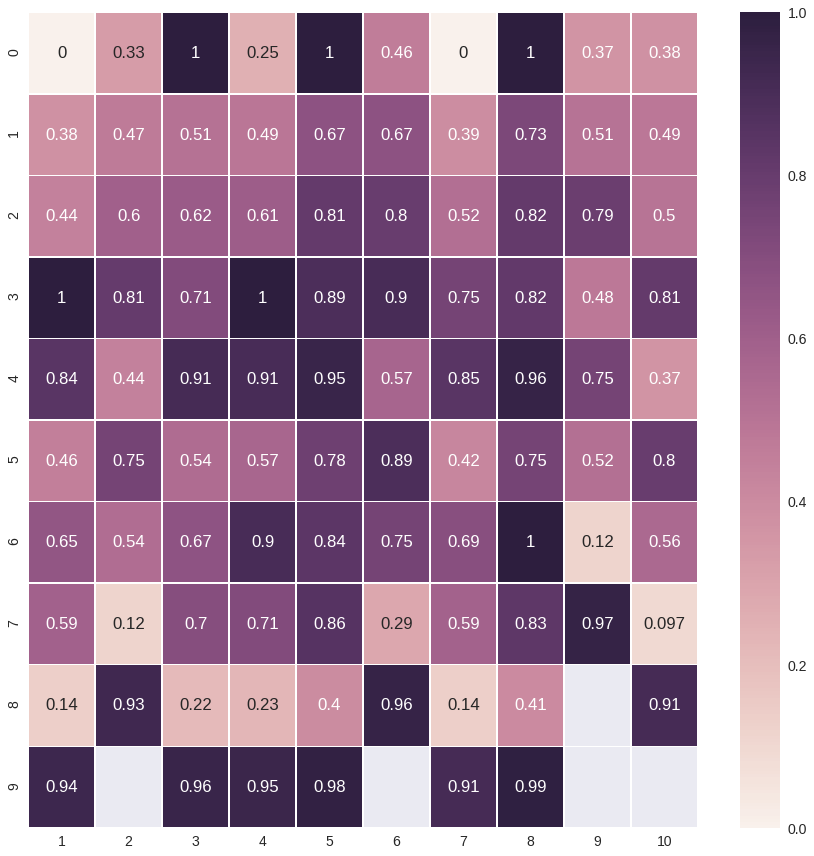

In [0]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(tmp, vmin=0, vmax=1, annot=True, linewidths=.5);


136223